### Implemention Using Sklearn 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

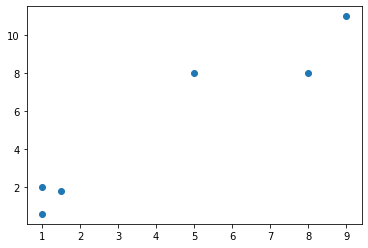

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
k_means = KMeans(n_clusters = 2)

In [6]:
k_means.fit(X)

KMeans(n_clusters=2)

In [7]:
k_means.labels_ #shows which point got into which cluster

array([0, 0, 1, 1, 0, 1])

In [8]:
k_means.cluster_centers_

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

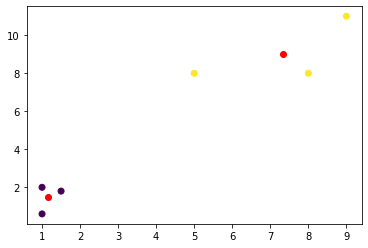

In [9]:
plt.scatter(X[:,0], X[:,1], c = k_means.labels_) #c = k_means.labels_ => coloring points belonging to same cluster
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color = 'r') # shows colored means of both the cluster
plt.show()

### New Data

In [10]:
X, y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [11]:
Kmean = KMeans(n_clusters = 5)

In [12]:
Kmean.fit(X)

KMeans(n_clusters=5)

In [13]:
tx = Kmean.cluster_centers_
tx

array([[-9.0671623 , -0.96740759],
       [ 7.8649674 ,  7.97988109],
       [ 0.88641907,  4.19441853],
       [-7.6726196 , -5.69211059],
       [-3.97953526,  0.19458336]])

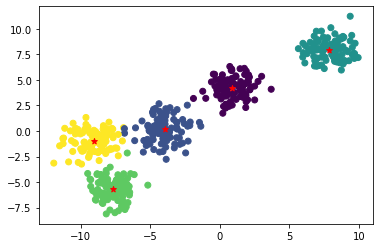

In [14]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.scatter(tx[:,0],tx[:,1],color = 'red', marker ='*')
plt.show()

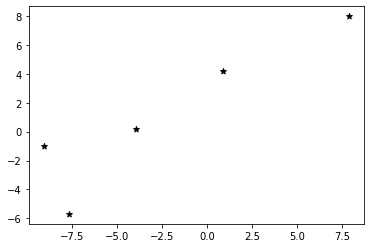

In [15]:
plt.scatter(tx[:,0],tx[:,1],color = 'black', marker ='*')
plt.show()

### Self Implementation Code for KMeans

In [16]:
def fit(data, numberOfClusterK = 5, max_iter = 100):
    #1. List : To store means of clusters
    #2. 2d List with K entries where each enteries represents
    # what all data points are cluster_1, cluster_2 ....
    means = list()
    for i in range(numberOfClusterK):
        means.append(data[i])
    for i in range(max_iter):
        # Assign the data point to the cluster that they belong to
        # Create empty clusters
        clusters = []
        for j in range(numberOfClusterK):
            clusters.append([])
            
        for point in data:
            # find distance to all the mean values
            distances = [((point - m)**2).sum() for m in means]
            # find the minimum distance 
            min_distance = min(distances)
            # Find the mean for which we got the minimum distance := l
            l = distances.index(min_distance)
            # add this point to the cluster l
            clusters[l].append(point)
            
        # calculate new mean values
        change = True
        for j in range(numberOfClusterK):
            new_mean = np.average(clusters[j],axis=0)
            # is no change in mean values then stop
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
            if not change:
                break
               
    return means

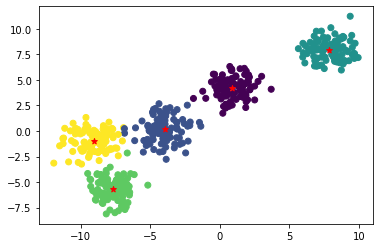

In [47]:
means = fit(X) #each mean is combination of [[x,y],and [x,y]]
# array below is coordinates of mean points of clusters
# given as [([x,y], [x,y])]
means = np.array(means)
plt.scatter(X[:,0],X[:,1],c = y)
plt.scatter(means[:,0],means[:,1],marker = '*', color = 'red')
plt.show()

In [48]:
means

array([[-7.6726196 , -5.69211059],
       [ 7.8649674 ,  7.97988109],
       [ 0.88641907,  4.19441853],
       [-9.0671623 , -0.96740759],
       [-3.97953526,  0.19458336]])

In [19]:
def predict(test_data, means):
    predictions = []
    for point in test_data:
        # find the distance of all the points from the mean
        distances = [((point - m)**2).sum() for m in means]
        # find the min distance
        minDistance = min(distances)
        # find the mean for which we got the minimum distance := l
        l = distances.index(minDistance)
        # add this point to the cluster 1
        predictions.append(l)
    return predictions

In [20]:
predict(X,means), print(X,end = " ")

[[-6.94238952e+00 -6.88072230e+00]
 [ 8.14492336e+00  7.52724561e+00]
 [-3.61995355e+00 -7.72691339e-02]
 [-8.91918262e+00 -6.77218900e+00]
 [-7.37151112e+00 -5.05064290e+00]
 [-4.65743008e+00  5.07750808e-02]
 [-9.85614721e+00 -1.94829844e+00]
 [-7.03064028e+00 -7.47212242e+00]
 [ 7.44598269e+00  9.20313614e+00]
 [-6.74761638e+00 -5.40793452e+00]
 [ 8.73872704e+00  5.97009465e+00]
 [-3.89871930e+00  1.52191932e-01]
 [ 8.84851188e+00  9.26501008e+00]
 [-6.83038032e+00 -7.68741713e+00]
 [-4.65780461e+00  5.13396635e-01]
 [-9.14747586e+00 -5.83583269e+00]
 [ 8.27287322e+00  6.92062212e+00]
 [-6.67147607e+00 -5.89031942e+00]
 [-7.33837507e+00 -5.96439930e+00]
 [ 6.96905011e+00  6.34491640e+00]
 [ 1.87879015e+00  3.51452443e+00]
 [ 1.46173901e+00  3.38024741e+00]
 [-7.82304106e+00 -6.34230341e+00]
 [-3.78877994e+00 -2.48326959e-02]
 [-6.60607411e+00 -5.67971605e+00]
 [-2.28165277e-01  3.53653954e+00]
 [-1.03969262e+01 -2.88279724e-01]
 [-9.18719238e+00 -4.73496540e-01]
 [-4.45650534e+00  6

([0,
  1,
  4,
  0,
  0,
  4,
  3,
  0,
  1,
  0,
  1,
  4,
  1,
  0,
  4,
  0,
  1,
  0,
  0,
  1,
  2,
  2,
  0,
  4,
  0,
  2,
  3,
  3,
  4,
  3,
  0,
  3,
  2,
  2,
  0,
  2,
  1,
  1,
  0,
  2,
  2,
  2,
  3,
  3,
  4,
  1,
  1,
  3,
  3,
  3,
  1,
  0,
  3,
  0,
  0,
  2,
  0,
  0,
  1,
  4,
  1,
  4,
  4,
  0,
  3,
  1,
  4,
  4,
  2,
  4,
  2,
  0,
  2,
  0,
  2,
  4,
  0,
  3,
  2,
  2,
  4,
  2,
  4,
  3,
  1,
  3,
  4,
  1,
  3,
  4,
  3,
  2,
  0,
  2,
  2,
  1,
  0,
  4,
  4,
  2,
  1,
  2,
  4,
  4,
  1,
  1,
  1,
  4,
  4,
  0,
  1,
  3,
  0,
  1,
  4,
  2,
  1,
  3,
  2,
  4,
  1,
  4,
  3,
  0,
  2,
  3,
  3,
  3,
  0,
  0,
  4,
  4,
  0,
  1,
  1,
  3,
  4,
  3,
  4,
  0,
  0,
  2,
  4,
  1,
  3,
  0,
  1,
  1,
  0,
  4,
  0,
  0,
  4,
  4,
  1,
  2,
  2,
  3,
  4,
  0,
  2,
  1,
  3,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  3,
  0,
  2,
  1,
  2,
  3,
  0,
  4,
  1,
  3,
  1,
  0,
  1,
  2,
  3,
  3,
  2,
  0,
  4,
  1,
  2,
  4,
  3,
  0,
  3,
  2,
  4,
  3,
  0,
  0,


## Implementing it into a class

In [21]:
class K_Means:
    def __init__(self,numberOfClusterK = 2 ,max_iter = 100 ):
        print("Constructor")
        self.numberOfClusterK = numberOfClusterK
        self.max_iter = max_iter
        
    def fit(self,data):
        #1. List : To store means of clusters
        #2. 2d List with K entries where each enteries represents
        # what all data points are cluster_1, cluster_2 ....
        #1. List : To store means of clusters
    #2. 2d List with K entries where each enteries represents
    # what all data points are cluster_1, cluster_2 ....
        self.means = list()
        for i in range(self.numberOfClusterK):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # Assign the data point to the cluster that they belong to
            # Create empty clusters
            clusters = []
            for j in range(self.numberOfClusterK):
                clusters.append([])

            for point in data:
                # find distance to all the mean values
                distances = [((point - m)**2).sum() for m in self.means]
                # find the minimum distance 
                min_distance = min(distances)
                # Find the mean for which we got the minimum distance := l
                l = distances.index(min_distance)
                # add this point to the cluster l
                clusters[l].append(point)

            # calculate new mean values
            change = True
            for j in range(self.numberOfClusterK):
                new_mean = np.average(clusters[j],axis=0)
                # is no change in mean values then stop
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
                if not change:
                    break

        return self.means
        
    def predict(self,test_data):
        predictions = []
        for point in test_data:
            # find the distance of all the points from the mean
            distances = [((point - m)**2).sum() for m in self.means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distance := l
            l = distances.index(minDistance)
            # add this point to the cluster 1
            predictions.append(l)
        return predictions

In [22]:
kmean = K_Means(5,100)

Constructor


In [23]:
zz = kmean.fit(X)
zz = np.array(zz)
zz

array([[-7.6726196 , -5.69211059],
       [ 7.8649674 ,  7.97988109],
       [ 0.88641907,  4.19441853],
       [-9.0671623 , -0.96740759],
       [-3.97953526,  0.19458336]])

In [24]:
# now no need to pass means array because kmean.fit is not returning it
#kmean.predict(X) # same as sklearn :array([0, 0, 1, 1, 0, 1])

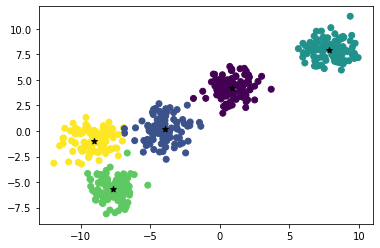

In [25]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.scatter(zz[:,0],zz[:,1], marker = "*", color = "black")
plt.show()

## Implementation #2

**Data Prepration**

In [26]:
from sklearn.datasets import make_blobs

In [27]:
# X,y = make_blobs?

In [28]:
X,y = make_blobs(n_samples = 500,n_features = 2 ,centers = 5, random_state = 3)

In [29]:
X[2]

array([-3.61995355, -0.07726913])

In [30]:
k = 5

colors = ['green','red','blue','yellow','orange','pink']

clusters = {}

for kx in range(k):
    center = 10.0*(2*np.random.random((X.shape[1],)) -1)
    points = []
    cluster = {
        
        'center' : center,
        'points' : points,
        'color' : colors[kx]
    }
    clusters[kx] = cluster
    
print (clusters)

{0: {'center': array([-1.843095  ,  7.88487583]), 'points': [], 'color': 'green'}, 1: {'center': array([-9.54817811,  2.07415569]), 'points': [], 'color': 'red'}, 2: {'center': array([-3.24263556,  6.65945001]), 'points': [], 'color': 'blue'}, 3: {'center': array([-3.79647931, -3.65560188]), 'points': [], 'color': 'yellow'}, 4: {'center': array([ 9.3431218, -0.571149 ]), 'points': [], 'color': 'orange'}}


In [31]:
# clusters[0]['center']

array([-1.843095  ,  7.88487583])

In [32]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [33]:
# v1 = np.array([1,2])
# v2 = np.array([3,5])
# distance(v1,v2)

In [44]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*") 

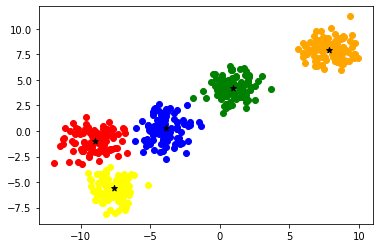

In [45]:
assignPointToClusters(clusters)
plotClusters(clusters)

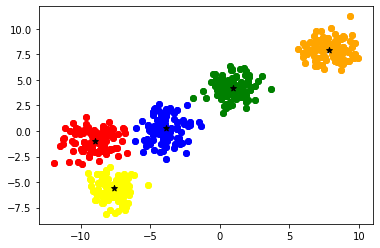

In [46]:
# Repeat this cell few times or put it inside a loop
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)